# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [131]:
df=pd.read_csv('drive/MyDrive/compresive_strength_concrete.csv')

In [132]:
data=df.copy()
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [134]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [135]:
x=data.loc[:,data.columns !='Concrete compressive strength(MPa, megapascals) ']
y=data.loc[:,data.columns =='Concrete compressive strength(MPa, megapascals) ']

In [136]:
y.shape

(1030, 1)

In [137]:
train_data,test_data,train_target,test_target=train_test_split(x,y,test_size=0.30,random_state=8)

In [138]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [139]:
train_data.shape

(721, 8)

In [155]:
def build_model():
  model =Sequential()
  model.add(Dense(12, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(6,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

In [156]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_target[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_target[:i * num_val_samples],train_target[(i + 1) * num_val_samples:]],axis=0)
  model2 = build_model()
  history = model2.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=50, verbose=1)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/100
11/11 [==============================] - 1s 21ms/step - loss: 1533.8450 - mae: 35.2359 - val_loss: 1522.2565 - val_mae: 35.4413
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 1540.9369 - mae: 35.3783 - val_loss: 1515.6941 - val_mae: 35.3616
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 1538.5712 - mae: 35.3344 - val_loss: 1507.2191 - val_mae: 35.2574
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 1566.8301 - mae: 35.6750 - val_loss: 1496.4979 - val_mae: 35.1212
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 1493.7522 - mae: 35.1730 - val_loss: 1482.8257 - val_mae: 34.9446
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 1551.4806 - mae: 35.5228 - val_loss: 1465.6538 - val_mae: 34.7231
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 1464.2356 - mae: 34.5233 - val_loss: 1443.5065 - val_mae: 34.4364
Epoch 

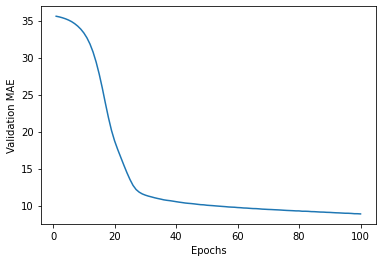

In [157]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

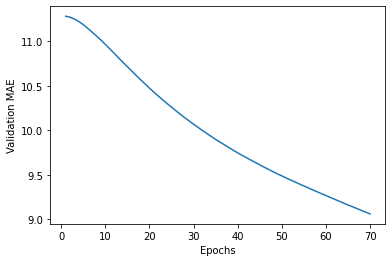

In [158]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[30:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [159]:
model = build_model()
model.fit(train_data, train_target,
epochs=500, batch_size=50, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_target)

Epoch 1/500
15/15 [==============================] - 0s 1ms/step - loss: 1629.5501 - mae: 36.2683
Epoch 2/500
15/15 [==============================] - 0s 1ms/step - loss: 1589.4978 - mae: 36.0711
Epoch 3/500
15/15 [==============================] - 0s 1ms/step - loss: 1627.8974 - mae: 36.5057
Epoch 4/500
15/15 [==============================] - 0s 1ms/step - loss: 1562.3744 - mae: 35.8566
Epoch 5/500
15/15 [==============================] - 0s 1ms/step - loss: 1477.5737 - mae: 34.6638
Epoch 6/500
15/15 [==============================] - 0s 1ms/step - loss: 1537.6687 - mae: 35.5058
Epoch 7/500
15/15 [==============================] - 0s 1ms/step - loss: 1520.3800 - mae: 35.1971
Epoch 8/500
15/15 [==============================] - 0s 1ms/step - loss: 1506.6939 - mae: 35.0378
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 1441.3306 - mae: 34.2896
Epoch 10/500
15/15 [==============================] - 0s 1ms/step - loss: 1348.8519 - mae: 32.9847
Epoch 11/500
15/15 

In [160]:
test_mae_score

5.041496753692627

In [162]:
acc=100-(test_mae_score/np.mean(test_target)*100)
acc

Concrete compressive strength(MPa, megapascals)     86.091541
dtype: float64